In [ ]:
##Installing darts
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.3/917.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
##Import data
data = pd.read_csv('/content/PDB_Load_History.csv')
data.head()


,date,year,month,day,weekday,hour,demand,temperature
0,3/1/2003,2003,3,1,7,1,12863.0,29
1,3/1/2003,2003,3,1,7,2,12389.0,28
2,3/1/2003,2003,3,1,7,3,12155.0,29
3,3/1/2003,2003,3,1,7,4,12072.0,27
4,3/1/2003,2003,3,1,7,5,12160.0,29


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103776 entries, 0 to 103775
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         103776 non-null  object 
 1   year         103776 non-null  int64  
 2   month        103776 non-null  int64  
 3   day          103776 non-null  int64  
 4   weekday      103776 non-null  int64  
 5   hour         103776 non-null  int64  
 6   demand       103776 non-null  float64
 7   temperature  103776 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.3+ MB


In [ ]:
#Converting date column to Datetime
data['date'] = pd.to_datetime(data['date'])
data = data.set_index("date")
data[['demand','temperature']].describe()


,demand,temperature
count,103776.000000,103776.000000
mean,14674.947493,50.576097
std,2894.544130,18.300454
min,7794.000000,-7.000000
25%,12514.000000,36.000000
50%,14773.000000,51.000000
75%,16443.000000,65.000000
max,27622.000000,100.000000


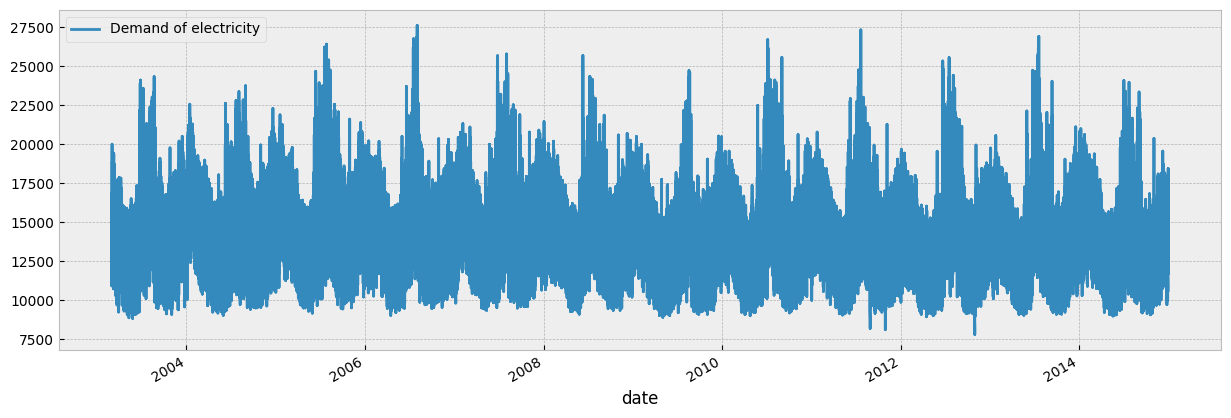

In [ ]:
plt.style.use("bmh")
plt.figure(figsize=(15,5))
data.demand.plot(label='Demand of electricity')
plt.legend();

In [ ]:
list(data.columns)

['year', 'month', 'day', 'weekday', 'hour', 'demand', 'temperature']

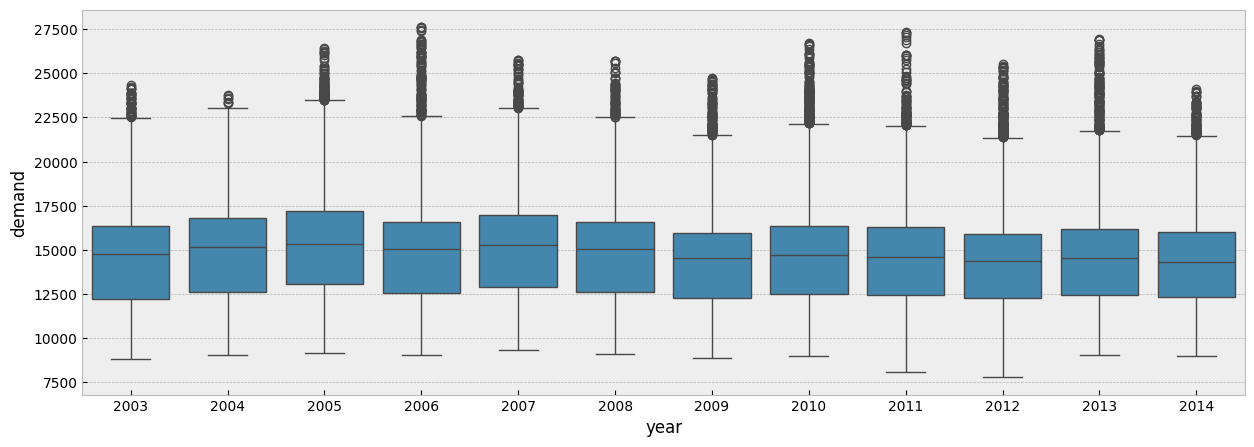

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='year', y='demand');

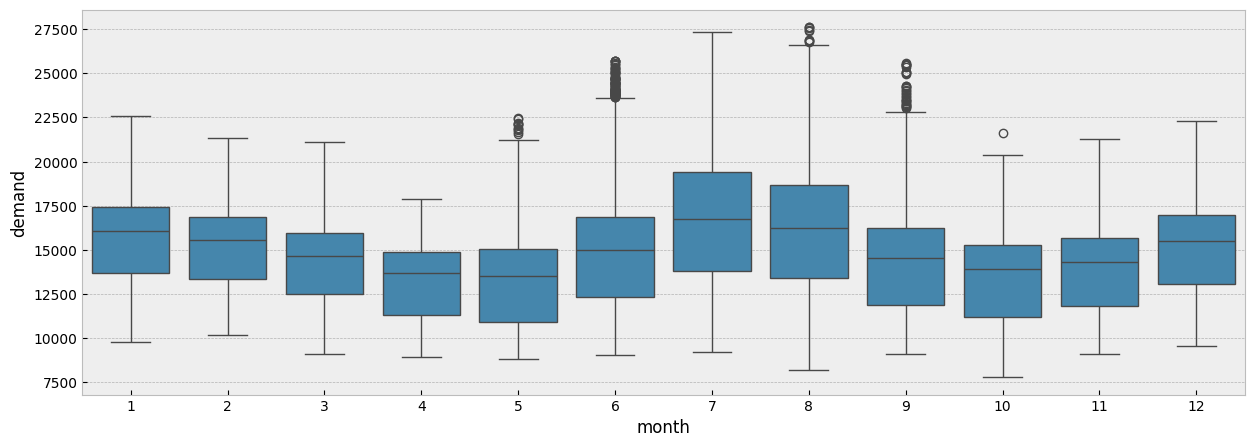

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='month', y='demand');

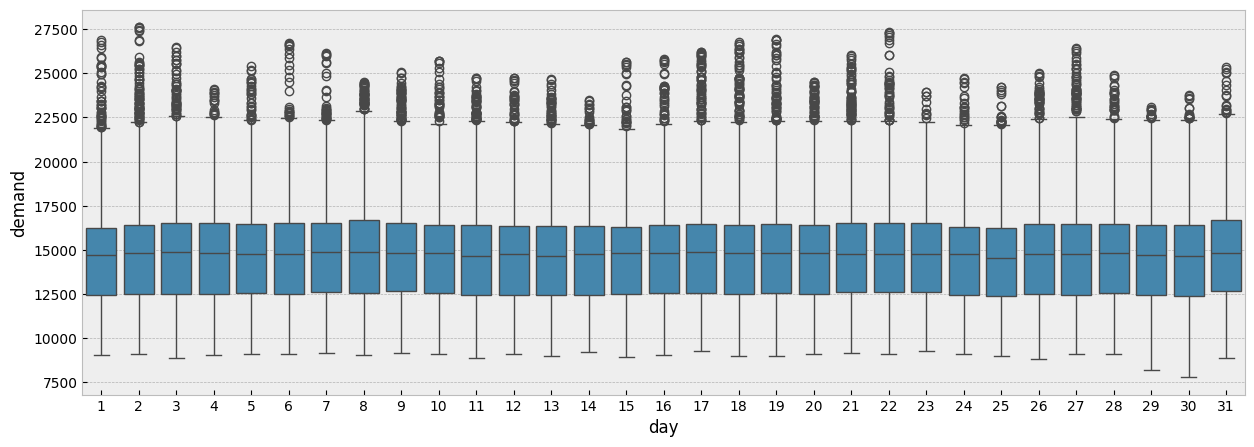

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='day', y='demand');

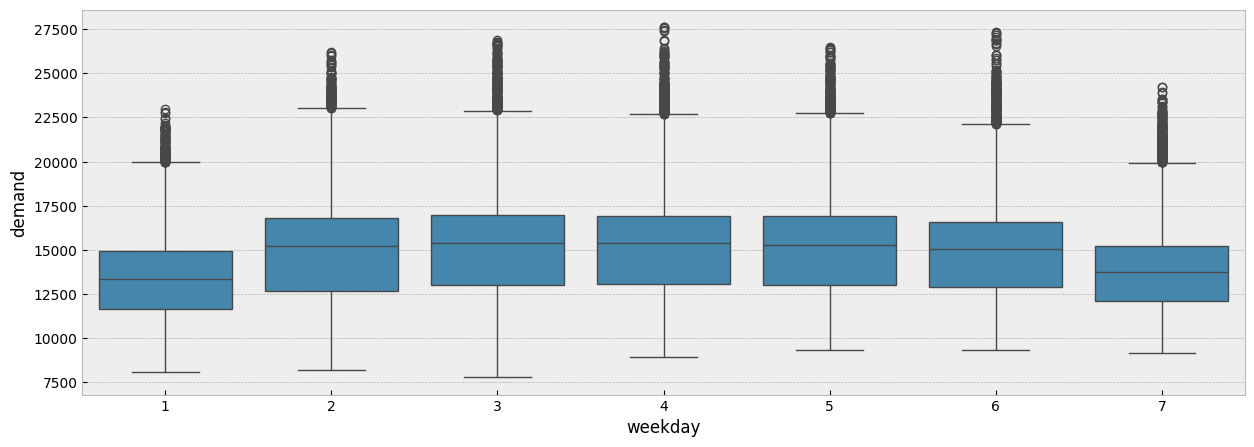

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='weekday', y='demand');

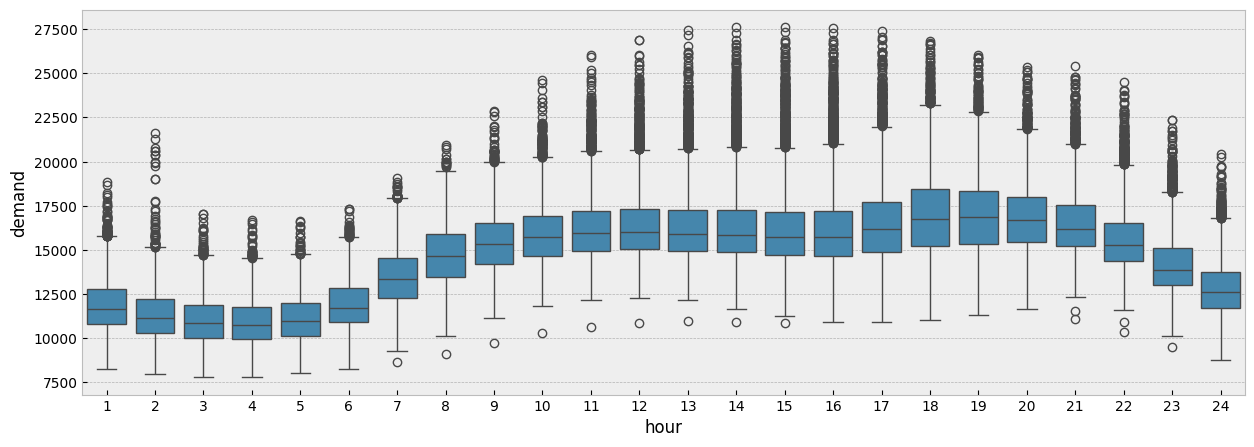

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='hour', y='demand');

In [ ]:
#Resampling demand at daily level
daily_demand = pd.DataFrame(data[['demand']].resample('D', origin = 'start').sum())
# daily_demand.reset_index(inplace=True)
daily_demand.head()

,demand
date,
2003-03-01,341205.0
2003-03-02,332439.0
2003-03-03,392373.0
2003-03-04,397812.0
2003-03-05,369405.0


In [ ]:
#Creating timeseries object for demand
from darts import TimeSeries
series_demand = TimeSeries.from_dataframe(daily_demand, value_cols='demand')
series_demand

<TimeSeries (DataArray) (date: 4324, component: 1, sample: 1)>
array([[[341205.]],

       [[332439.]],

       [[392373.]],

       ...,

       [[343975.]],

       [[366625.]],

       [[368451.]]])
Coordinates:
  * date       (date) datetime64[ns] 2003-03-01 2003-03-02 ... 2014-12-31
  * component  (component) object 'demand'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

seasonal? True
There is seasonality of order 7.


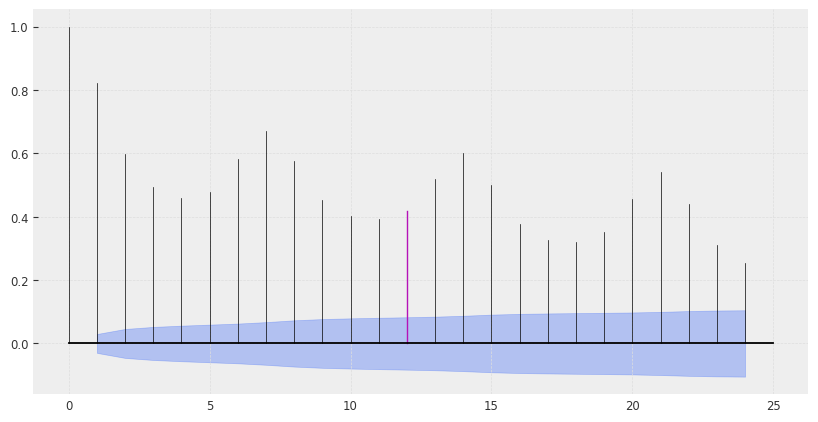

In [ ]:
# Check for seasonality
from darts.utils.statistics import plot_acf, check_seasonality

for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(series_demand, m=m, alpha=0.05)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

plot_acf(series_demand, m=12, alpha=0.05)

<Axes: xlabel='date'>

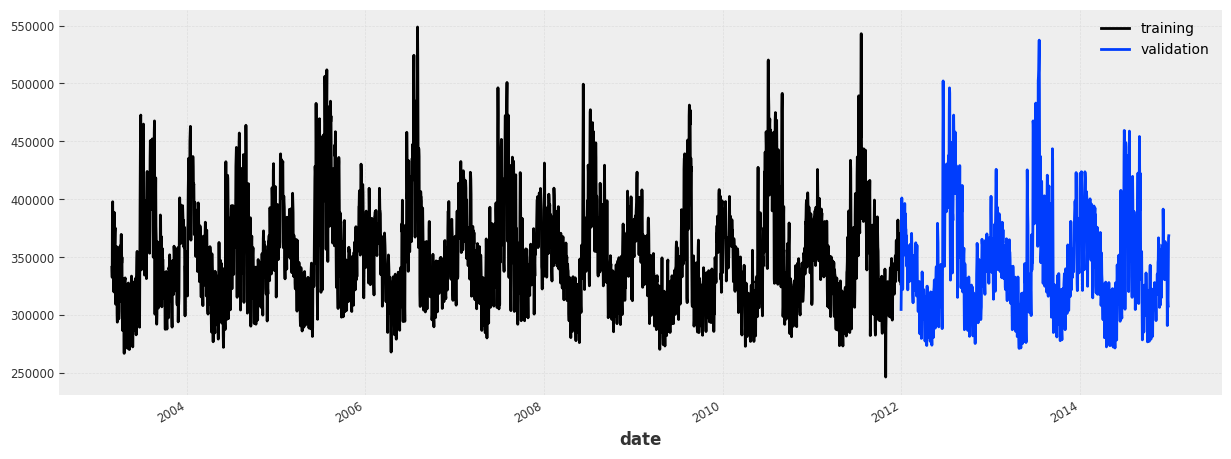

In [ ]:
train, val = series_demand.split_before(pd.Timestamp("20120101"))
plt.figure(figsize=(15,5))
train.plot(label="training")
val.plot(label="validation")

In [ ]:
from darts.models import ExponentialSmoothing, FFT, Prophet, AutoARIMA, Theta
from darts.metrics import mape, r2_score

def eval_model(model):
    start_time = datetime.now()
    model.fit(train)
    time_elapsed = datetime.now() - start_time
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}% , Training time: {}".format(model, mape(val, forecast), time_elapsed))

eval_model(ExponentialSmoothing())
eval_model(FFT())
eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/id_vopem.json


model ExponentialSmoothing() obtains MAPE: 137.17% , Training time: 0:00:00.612278
model FFT() obtains MAPE: 11.33% , Training time: 0:00:00.018544


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/rjpyby_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90834', 'data', 'file=/tmp/tmp2r_jqdd2/id_vopem.json', 'init=/tmp/tmp2r_jqdd2/rjpyby_j.json', 'output', 'file=/tmp/tmp2r_jqdd2/prophet_model1l2nngv6/prophet_model-20240624070007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


model Prophet() obtains MAPE: 5.40% , Training time: 0:00:00.835030
model AutoARIMA() obtains MAPE: 9.01% , Training time: 0:01:35.481690
model Theta() obtains MAPE: 8.94% , Training time: 0:00:00.030622


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
model_demand = Prophet()
model_demand.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/_zu_r_9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/1owd2c74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49584', 'data', 'file=/tmp/tmp2r_jqdd2/_zu_r_9g.json', 'init=/tmp/tmp2r_jqdd2/1owd2c74.json', 'output', 'file=/tmp/tmp2r_jqdd2/prophet_model659qhe2g/prophet_model-20240624070202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

Text(0.5, 1.0, 'MAPE: 5.402568039730862')

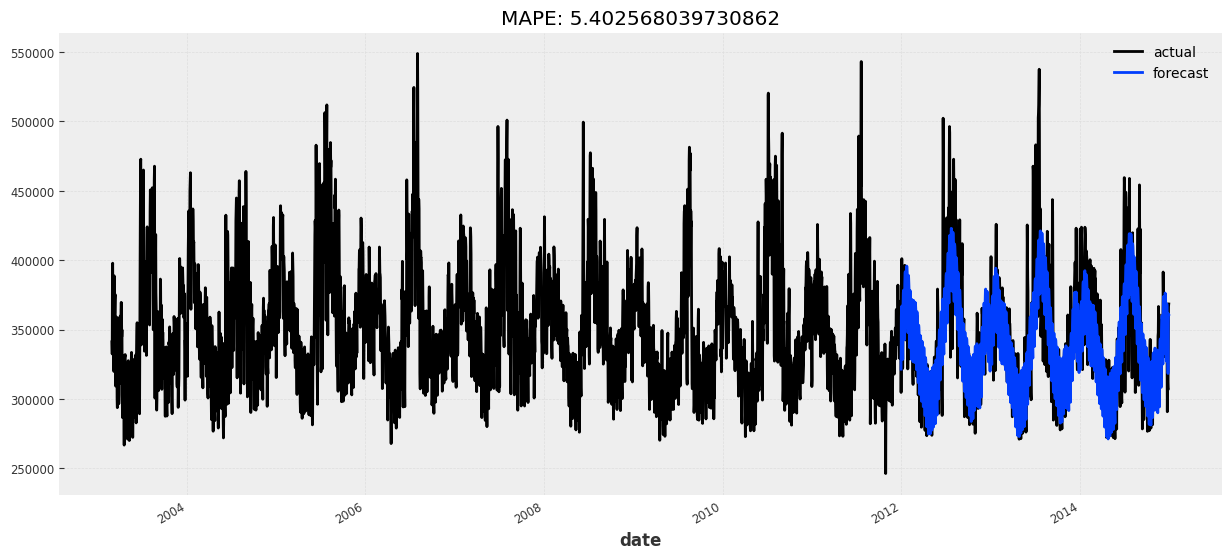

In [ ]:
# use the model to make a forecast
pred_demand = model_demand.predict(len(val))

plt.figure(figsize=(15, 6))
series_demand.plot(label="actual")
pred_demand.plot(label="forecast")
plt.title("MAPE: {}".format(mape(val, pred_demand)))

  0%|          | 0/19 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/zmyitrwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/0i8cdyhw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1455', 'data', 'file=/tmp/tmp2r_jqdd2/zmyitrwc.json', 'init=/tmp/tmp2r_jqdd2/0i8cdyhw.json', 'output', 'file=/tmp/tmp2r_jqdd2/prophet_model6r55yiky/prophet_model-20240624070242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  5%|▌         | 1/19 [00:01<00:23,  1.28s/it]INFO:prophet:Disabling daily seasonality. Run prophet with 

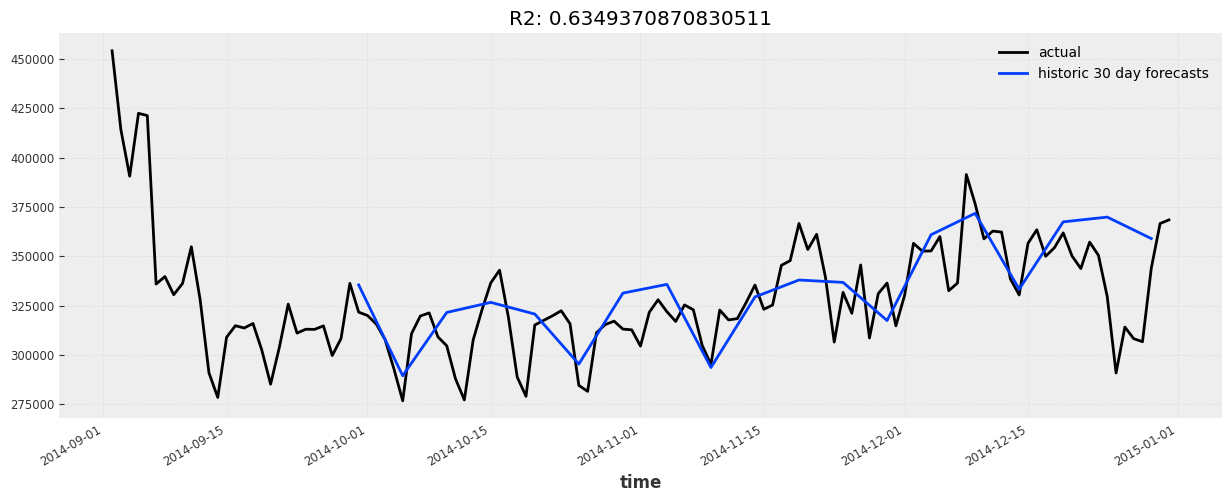

In [ ]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(15, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

pred_series = model_demand.historical_forecasts(
    series_demand,
    start=pd.Timestamp("20140901"),
    forecast_horizon=30,
    stride=5,
    verbose=True,
)
display_forecast(pred_series, series_demand, "30 day", start_date=pd.Timestamp("20140901"))

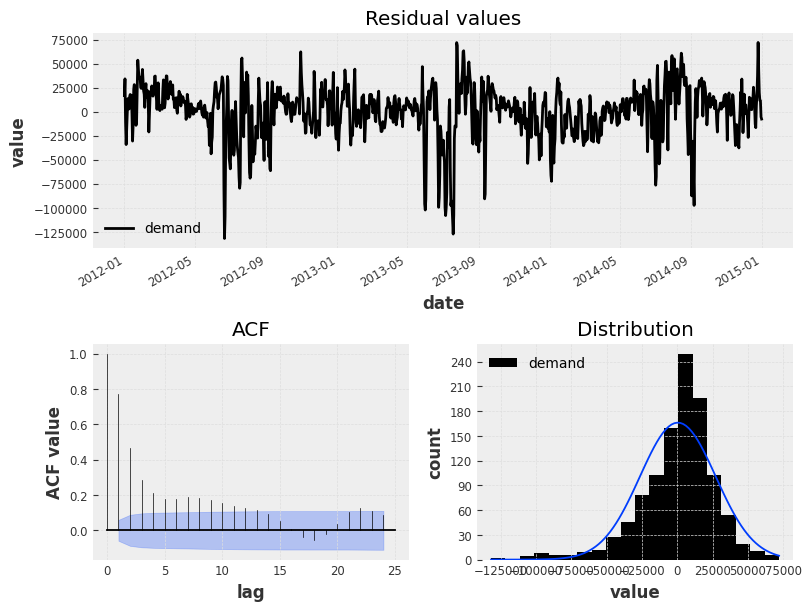

In [ ]:
# investigate the residuals in the validation dataset
from darts.utils.statistics import plot_residuals_analysis
resid = pred_demand - val
plot_residuals_analysis(resid);

In [ ]:
#Resampling temperature at daily level
daily_temp = pd.DataFrame(data[['temperature']].resample('D', origin = 'start').mean())
daily_temp.head()


,temperature
date,
2003-03-01,32.083333
2003-03-02,34.458333
2003-03-03,14.958333
2003-03-04,18.791667
2003-03-05,36.458333


In [ ]:
#Creating timeseries object for temperature
from darts import TimeSeries
series_temp = TimeSeries.from_dataframe(daily_temp, value_cols='temperature')
series_temp

<TimeSeries (DataArray) (date: 4324, component: 1, sample: 1)>
array([[[32.08333333]],

       [[34.45833333]],

       [[14.95833333]],

       ...,

       [[34.125     ]],

       [[23.5       ]],

       [[21.29166667]]])
Coordinates:
  * date       (date) datetime64[ns] 2003-03-01 2003-03-02 ... 2014-12-31
  * component  (component) object 'temperature'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
model_future_covs = Prophet()
model_future_covs.fit(train, future_covariates=series_temp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/v3vg6t5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/npuq03_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36824', 'data', 'file=/tmp/tmp2r_jqdd2/v3vg6t5o.json', 'init=/tmp/tmp2r_jqdd2/npuq03_y.json', 'output', 'file=/tmp/tmp2r_jqdd2/prophet_modelywavs6ra/prophet_model-20240624070417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

Text(0.5, 1.0, 'MAPE: 5.521385657680794')

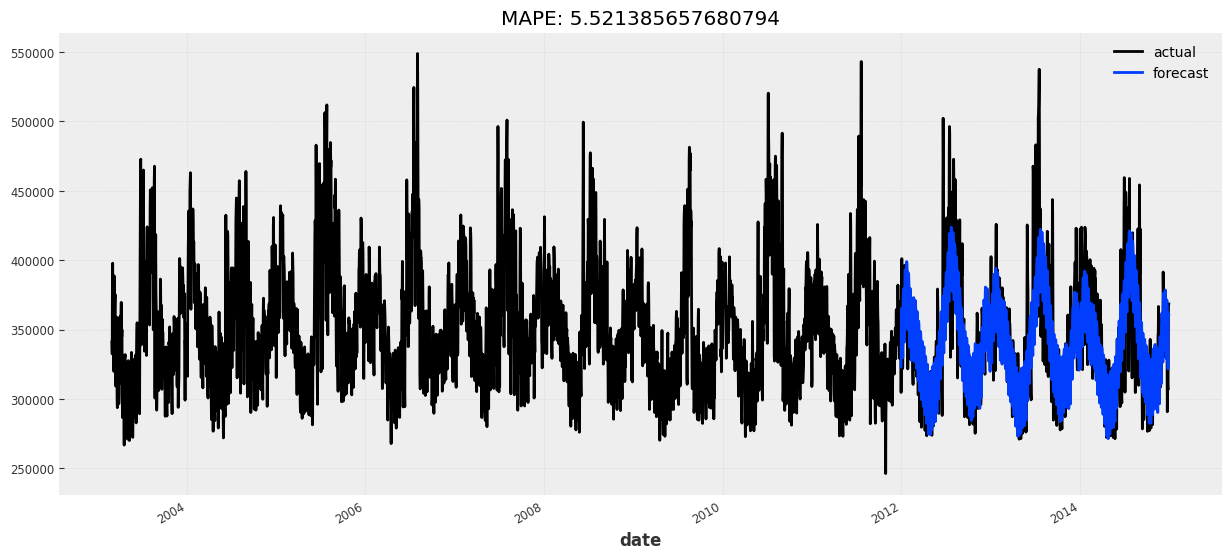

In [ ]:
# use the model to make a forecast
pred_demand_covs = model_future_covs.predict(len(val), future_covariates=series_temp)

plt.figure(figsize=(15, 6))
series_demand.plot(label="actual")
pred_demand_covs.plot(label="forecast")
plt.title("MAPE: {}".format(mape(val, pred_demand_covs)))

  0%|          | 0/19 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/eatf1mow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2r_jqdd2/tftydvt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15022', 'data', 'file=/tmp/tmp2r_jqdd2/eatf1mow.json', 'init=/tmp/tmp2r_jqdd2/tftydvt0.json', 'output', 'file=/tmp/tmp2r_jqdd2/prophet_modelibfo6_vz/prophet_model-20240624070452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  5%|▌         | 1/19 [00:01<00:31,  1.78s/it]INFO:prophet:Disabling daily seasonality. Run prophet with

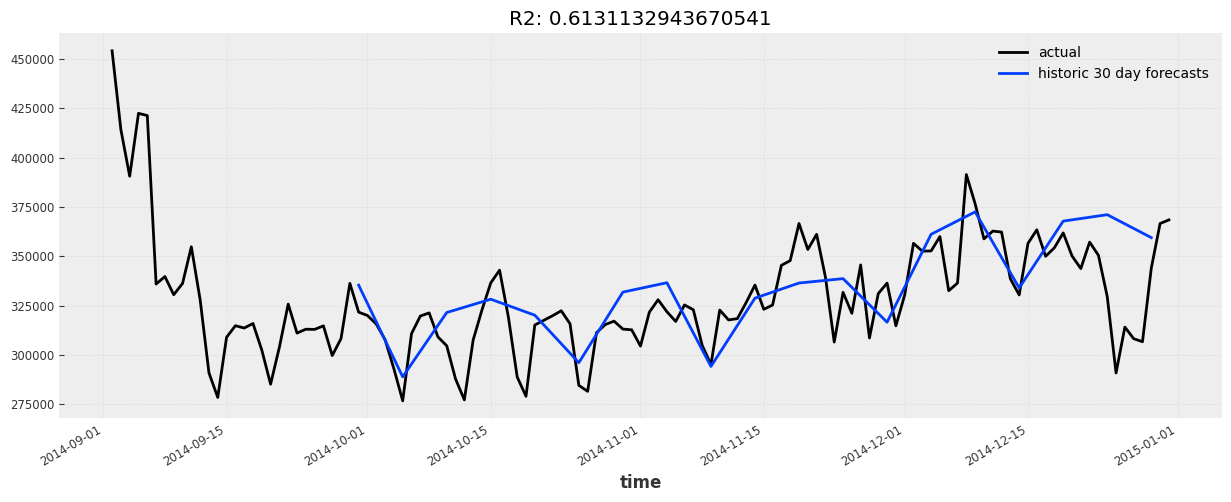

In [ ]:
pred_series = model_demand.historical_forecasts(
    series_demand,
    start=pd.Timestamp("20140901"),
    forecast_horizon=30,
    stride=5,
    verbose=True, future_covariates=series_temp
)
display_forecast(pred_series, series_demand, "30 day", start_date=pd.Timestamp("20140901"))